<a href="https://colab.research.google.com/github/VictoriaPedrozaAI/NLP-Projects/blob/main/Amazon_NLTK_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [5]:
! pip install nltk

In [6]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from nltk.tokenize import word_tokenize, sent_tokenize, WordPunctTokenizer, TreebankWordTokenizer, RegexpTokenizer
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.chunk import ne_chunk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import time
import warnings
warnings.filterwarnings('ignore')

## Mount Drive - Amazon Dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/NLP - Project/Task 2/Reviews.csv')

## Pre-processing

In [9]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [11]:
df.shape

(568454, 10)

In [12]:
blanks = df[df.isnull().any(axis=1)].index

df.drop(blanks, inplace=True)

# verifying that there are no more null values
print(df.isnull().sum())

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [13]:
df.shape

(568401, 10)

In [14]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [15]:
text =df ['Text']

## Read File

In [16]:
text.head(5)

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [17]:
text.info()

<class 'pandas.core.series.Series'>
Index: 568401 entries, 0 to 568453
Series name: Text
Non-Null Count   Dtype 
--------------   ----- 
568401 non-null  object
dtypes: object(1)
memory usage: 8.7+ MB


In [18]:
print(text[50])

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [19]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
score_count= df['Score'].value_counts()

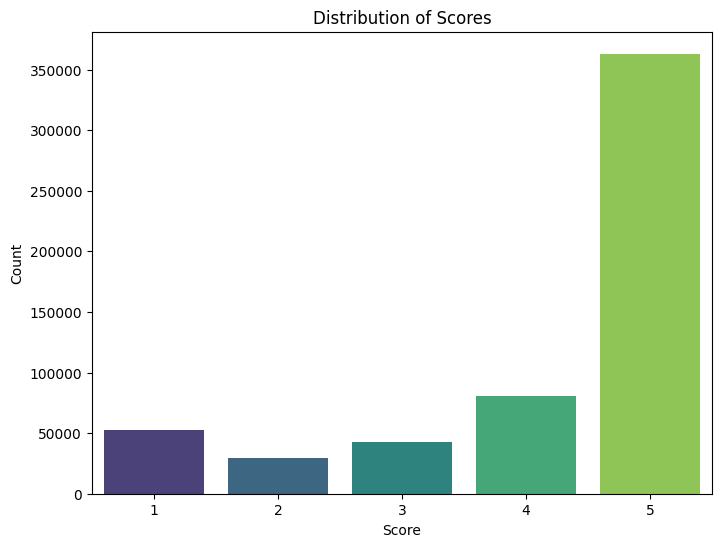

In [21]:
score_count = score_count.sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=score_count.index, y=score_count.values, palette='viridis')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

## NLTK

In [22]:
example1 = text[50]
print (example1)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [23]:
print(text.head())
print(text.index)

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object
Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       568444, 568445, 568446, 568447, 568448, 568449, 568450, 568451, 568452,
       568453],
      dtype='int64', length=568401)


### Lower casing

In [24]:
df['Text'] = df['Text'].apply(lambda x: x.lower())

In [25]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price. there was a wid...


### Tokenization

In [26]:
example2 = text [10]
print(example2)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [27]:
sentence = sent_tokenize(example2)
print(sentence)

["I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!", 'We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!', "When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.", 'Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!']


In [28]:
tokens = word_tokenize(example2)
print(tokens)

['I', 'do', "n't", 'know', 'if', 'it', "'s", 'the', 'cactus', 'or', 'the', 'tequila', 'or', 'just', 'the', 'unique', 'combination', 'of', 'ingredients', ',', 'but', 'the', 'flavour', 'of', 'this', 'hot', 'sauce', 'makes', 'it', 'one', 'of', 'a', 'kind', '!', 'We', 'picked', 'up', 'a', 'bottle', 'once', 'on', 'a', 'trip', 'we', 'were', 'on', 'and', 'brought', 'it', 'back', 'home', 'with', 'us', 'and', 'were', 'totally', 'blown', 'away', '!', 'When', 'we', 'realized', 'that', 'we', 'simply', 'could', "n't", 'find', 'it', 'anywhere', 'in', 'our', 'city', 'we', 'were', 'bummed.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'Now', ',', 'because', 'of', 'the', 'magic', 'of', 'the', 'internet', ',', 'we', 'have', 'a', 'case', 'of', 'the', 'sauce', 'and', 'are', 'ecstatic', 'because', 'of', 'it.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'If', 'you', 'love', 'hot', 'sauce', '..', 'I', 'mean', 'really', 'love', 'hot', 'sauce', ',', 'but', 'do', "n't", 'want', 'a', 'sauce', 'that', 'tastelessly',

In [29]:
tokenizer = WordPunctTokenizer()
tokens = tokenizer.tokenize(example2)
print(tokens)

['I', 'don', "'", 't', 'know', 'if', 'it', "'", 's', 'the', 'cactus', 'or', 'the', 'tequila', 'or', 'just', 'the', 'unique', 'combination', 'of', 'ingredients', ',', 'but', 'the', 'flavour', 'of', 'this', 'hot', 'sauce', 'makes', 'it', 'one', 'of', 'a', 'kind', '!', 'We', 'picked', 'up', 'a', 'bottle', 'once', 'on', 'a', 'trip', 'we', 'were', 'on', 'and', 'brought', 'it', 'back', 'home', 'with', 'us', 'and', 'were', 'totally', 'blown', 'away', '!', 'When', 'we', 'realized', 'that', 'we', 'simply', 'couldn', "'", 't', 'find', 'it', 'anywhere', 'in', 'our', 'city', 'we', 'were', 'bummed', '.<', 'br', '/><', 'br', '/>', 'Now', ',', 'because', 'of', 'the', 'magic', 'of', 'the', 'internet', ',', 'we', 'have', 'a', 'case', 'of', 'the', 'sauce', 'and', 'are', 'ecstatic', 'because', 'of', 'it', '.<', 'br', '/><', 'br', '/>', 'If', 'you', 'love', 'hot', 'sauce', '..', 'I', 'mean', 'really', 'love', 'hot', 'sauce', ',', 'but', 'don', "'", 't', 'want', 'a', 'sauce', 'that', 'tastelessly', 'burns'

In [30]:
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(example2)
print(tokens)

['I', 'do', "n't", 'know', 'if', 'it', "'s", 'the', 'cactus', 'or', 'the', 'tequila', 'or', 'just', 'the', 'unique', 'combination', 'of', 'ingredients', ',', 'but', 'the', 'flavour', 'of', 'this', 'hot', 'sauce', 'makes', 'it', 'one', 'of', 'a', 'kind', '!', 'We', 'picked', 'up', 'a', 'bottle', 'once', 'on', 'a', 'trip', 'we', 'were', 'on', 'and', 'brought', 'it', 'back', 'home', 'with', 'us', 'and', 'were', 'totally', 'blown', 'away', '!', 'When', 'we', 'realized', 'that', 'we', 'simply', 'could', "n't", 'find', 'it', 'anywhere', 'in', 'our', 'city', 'we', 'were', 'bummed.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'Now', ',', 'because', 'of', 'the', 'magic', 'of', 'the', 'internet', ',', 'we', 'have', 'a', 'case', 'of', 'the', 'sauce', 'and', 'are', 'ecstatic', 'because', 'of', 'it.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'If', 'you', 'love', 'hot', 'sauce..I', 'mean', 'really', 'love', 'hot', 'sauce', ',', 'but', 'do', "n't", 'want', 'a', 'sauce', 'that', 'tastelessly', 'burns'

In [31]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
tokens = tokenizer.tokenize(example2)
print(tokens)

['I', 'don', "'t", 'know', 'if', 'it', "'s", 'the', 'cactus', 'or', 'the', 'tequila', 'or', 'just', 'the', 'unique', 'combination', 'of', 'ingredients', ',', 'but', 'the', 'flavour', 'of', 'this', 'hot', 'sauce', 'makes', 'it', 'one', 'of', 'a', 'kind', '!', 'We', 'picked', 'up', 'a', 'bottle', 'once', 'on', 'a', 'trip', 'we', 'were', 'on', 'and', 'brought', 'it', 'back', 'home', 'with', 'us', 'and', 'were', 'totally', 'blown', 'away', '!', 'When', 'we', 'realized', 'that', 'we', 'simply', 'couldn', "'t", 'find', 'it', 'anywhere', 'in', 'our', 'city', 'we', 'were', 'bummed', '.<br', '/><br', '/>Now,', 'because', 'of', 'the', 'magic', 'of', 'the', 'internet', ',', 'we', 'have', 'a', 'case', 'of', 'the', 'sauce', 'and', 'are', 'ecstatic', 'because', 'of', 'it', '.<br', '/><br', '/>If', 'you', 'love', 'hot', 'sauce', '..I', 'mean', 'really', 'love', 'hot', 'sauce', ',', 'but', 'don', "'t", 'want', 'a', 'sauce', 'that', 'tastelessly', 'burns', 'your', 'throat', ',', 'grab', 'a', 'bottle', 

### Tags

In [32]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [95]:
tokens = word_tokenize(example2)

#  POS tagging
tags = nltk.pos_tag(tokens)
print(tags[:35]) # Print the first 35 tags

[('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('know', 'VB'), ('if', 'IN'), ('it', 'PRP'), ("'s", 'VBZ'), ('the', 'DT'), ('cactus', 'NN'), ('or', 'CC'), ('the', 'DT'), ('tequila', 'NN'), ('or', 'CC'), ('just', 'RB'), ('the', 'DT'), ('unique', 'JJ'), ('combination', 'NN'), ('of', 'IN'), ('ingredients', 'NNS'), (',', ','), ('but', 'CC'), ('the', 'DT'), ('flavour', 'NN'), ('of', 'IN'), ('this', 'DT'), ('hot', 'JJ'), ('sauce', 'NN'), ('makes', 'VBZ'), ('it', 'PRP'), ('one', 'CD'), ('of', 'IN'), ('a', 'DT'), ('kind', 'NN'), ('!', '.'), ('We', 'PRP')]


### Entities

In [34]:
import nltk
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [35]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [36]:
entities = nltk.chunk.ne_chunk(tags)

In [37]:
print(entities)

(S
  I/PRP
  do/VBP
  n't/RB
  know/VB
  if/IN
  it/PRP
  's/VBZ
  the/DT
  cactus/NN
  or/CC
  the/DT
  tequila/NN
  or/CC
  just/RB
  the/DT
  unique/JJ
  combination/NN
  of/IN
  ingredients/NNS
  ,/,
  but/CC
  the/DT
  flavour/NN
  of/IN
  this/DT
  hot/JJ
  sauce/NN
  makes/VBZ
  it/PRP
  one/CD
  of/IN
  a/DT
  kind/NN
  !/.
  We/PRP
  picked/VBD
  up/RP
  a/DT
  bottle/NN
  once/RB
  on/IN
  a/DT
  trip/NN
  we/PRP
  were/VBD
  on/IN
  and/CC
  brought/VBD
  it/PRP
  back/RP
  home/NN
  with/IN
  us/PRP
  and/CC
  were/VBD
  totally/RB
  blown/VBN
  away/RB
  !/.
  When/WRB
  we/PRP
  realized/VBD
  that/IN
  we/PRP
  simply/RB
  could/MD
  n't/RB
  find/VB
  it/PRP
  anywhere/RB
  in/IN
  our/PRP$
  city/NN
  we/PRP
  were/VBD
  bummed./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Now/RB
  ,/,
  because/IN
  of/IN
  the/DT
  magic/NN
  of/IN
  the/DT
  internet/NN
  ,/,
  we/PRP
  have/VBP
  a/DT
  case/NN
  of/IN
  the/DT
  sauce/NN
  and/CC
  are/VBP


### Stemming

In [38]:
words = ['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', "don't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']

ps = PorterStemmer()
for word in words:
    print(f"{word} → {ps.stem(word)}")

This → thi
oatmeal → oatmeal
is → is
not → not
good → good
. → .
Its → it
mushy → mushi
, → ,
soft → soft
, → ,
I → i
don't → don't
like → like
it → it
. → .
Quaker → quaker
Oats → oat
is → is
the → the
way → way
to → to
go → go
. → .


In [39]:
ps = PorterStemmer()
sentence = "i have bought several of the vitality canned dog food products and have found them all to be of good quality."
words = word_tokenize(sentence)
for word in words:
    print(f"{word} → {ps.stem(word)}")

i → i
have → have
bought → bought
several → sever
of → of
the → the
vitality → vital
canned → can
dog → dog
food → food
products → product
and → and
have → have
found → found
them → them
all → all
to → to
be → be
of → of
good → good
quality → qualiti
. → .


In [40]:
length = len(example2)
print(length)

779


## Vader Sentiment

In [96]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk # Import nltk

# vader_lexicon resource
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sid.polarity_scores(example2)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [42]:
example3 = text [1]
print(example3)

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".


In [43]:
sid.polarity_scores(example3) #this is a negative review where compound is <=-05

{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}

In [44]:
sid.polarity_scores(example1)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [45]:
df2 = df.copy()

In [46]:
def get_sentiment_label(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [47]:
compound_scores = []
neg_scores = []
neu_scores = []
pos_scores = []

for index, row in tqdm(df2.iterrows(), total=len(df2)):
    text_content = row['Text']
    score = sid.polarity_scores(text_content)
    compound_scores.append(score['compound'])
    neg_scores.append(score['neg'])
    neu_scores.append(score['neu'])
    pos_scores.append(score['pos'])

df2['vader_compound'] = compound_scores
df2['vader_neg'] = neg_scores
df2['vader_neu'] = neu_scores
df2['vader_pos'] = pos_scores

display(df2.head())

  0%|          | 0/568401 [00:00<?, ?it/s]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,vader_compound,vader_neg,vader_neu,vader_pos
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,0.9441,0.000,0.695,0.305
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,-0.5664,0.138,0.862,0.000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,0.8265,0.091,0.754,0.155
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,0.0000,0.000,1.000,0.000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price. there was a wid...,0.9468,0.000,0.552,0.448


In [49]:
df2['sentiment_vader'] = df2['vader_compound'].apply(get_sentiment_label)
display(df2.head(5))

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,vader_compound,vader_neg,vader_neu,vader_pos,sentiment_vader
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,0.9441,0.000,0.695,0.305,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,-0.5664,0.138,0.862,0.000,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,0.8265,0.091,0.754,0.155,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,0.0000,0.000,1.000,0.000,Neutral
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price. there was a wid...,0.9468,0.000,0.552,0.448,Positive


In [94]:
#Sentiment Distibution Vader
from collections import Counter

if 'sentiment_label' not in df2.columns:
     df2['sentiment_label'] = df2['vader_compound'].apply(get_sentiment_label)


label_counts = df2['sentiment_label'].value_counts()
total = len(df2)

print("Vader")
print("-" * 25)
for label in ['Negative', 'Neutral', 'Positive']:
    count = label_counts.get(label, 0)
    percentage = (count / total * 100) if total > 0 else 0
    print(f"{label:<8}: {count:>3} ({percentage:>5.1f}%)")

print(f"\nTotal samples: {total}")
print(f"Average compound score: {df2['vader_compound'].mean():.3f}")

Vader
-------------------------
Negative: 59328 ( 10.4%)
Neutral : 12115 (  2.1%)
Positive: 496958 ( 87.4%)

Total samples: 568401
Average compound score: 0.647


# Transformers Roberta

In [51]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

### Transfer learning from Roberta

In [52]:
MD = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MD)
model = AutoModelForSequenceClassification.from_pretrained(MD)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [53]:
sid.polarity_scores(example1)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

### Encode text

In [54]:
print(example1)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [55]:
encoded_text=tokenizer(example1, return_tensors='pt')
print(encoded_text)

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}


##  Tokenizer with Roberta model

In [56]:

encoded_text=tokenizer(example1, return_tensors='pt')
output = model(**encoded_text)
scores= output[0][0].detach().numpy()
scores = softmax(scores)

scores_dict= {
    'Negative': float(scores[0]),
    'Neutral': float(scores[1]),
    'Positive': float(scores[2])
}
print(scores_dict)

{'Negative': 0.9763551354408264, 'Neutral': 0.020687464624643326, 'Positive': 0.002957369200885296}


In [57]:
predicted_label = max(scores_dict, key=scores_dict.get)
print(predicted_label)

Negative


## Roberta Scores

In [60]:
import torch
import numpy as np
import pandas as pd
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
from tqdm import tqdm
import gc
import os

# Model Roberta
MD = "cardiffnlp/twitter-roberta-base-sentiment"

# Tokenizer with FP16 for speed/memory to avoid crashes
device = 0 if torch.cuda.is_available() else -1
model = AutoModelForSequenceClassification.from_pretrained(MD, torch_dtype=torch.float16 if device == 0 else torch.float32)
tokenizer = AutoTokenizer.from_pretrained(MD)

# Pipeline in batches
sentiment_pipeline = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    device=device,
    return_all_scores=True,  #labels
    max_length=128,  # Truncate to save memory
)

print(f"Dataset size: {len(df2)} texts")
print(f"Using device: {'GPU' if device == 0 else 'CPU'}")

def process_chunk(texts, batch_size=64):
    results = sentiment_pipeline(texts.tolist(), batch_size=batch_size)
    neg = [r[0]['score'] for r in results]  # LABEL_0: negative
    neu = [r[1]['score'] for r in results]  # LABEL_1: neutral
    pos = [r[2]['score'] for r in results]  # LABEL_2: positive
    return np.array(neg), np.array(neu), np.array(pos)

# checkpoint
num_chunks = 20
chunk_size = len(df2) // num_chunks
checkpoint_file = 'sentiment_results.csv'

if os.path.exists(checkpoint_file):
    results_df = pd.read_csv(checkpoint_file)
    processed_count = len(results_df)
    print(f" {processed_count} processed samples.")
else:
    results_df = pd.DataFrame(columns=['roberta_negative', 'roberta_neutral', 'roberta_positive'])
    processed_count = 0

# Chunks with progress
for i in tqdm(range(processed_count // chunk_size, num_chunks), desc="Processing chunks"):
    start = i * chunk_size
    end = start + chunk_size if i < num_chunks - 1 else len(df2)
    chunk_texts = df2['Text'].iloc[start:end]

    print(f"Processing chunk {i+1}/{num_chunks}: samples {start}-{end}")

    neg, neu, pos = process_chunk(chunk_texts)

    chunk_results = pd.DataFrame({'roberta_negative': neg, 'roberta_neutral': neu, 'roberta_positive': pos})
    results_df = pd.concat([results_df, chunk_results], ignore_index=True)

    # checkpoint
    results_df.to_csv(checkpoint_file, index=False)

    # Clear cache
    if device == 0:
        torch.cuda.empty_cache()
    gc.collect()
    print(f"GPU Memory: {torch.cuda.memory_allocated()/1024**3:.2f} GB" if device == 0 else "CPU mode")

df2 = df2.join(results_df)
print("Sentiment complete")

`torch_dtype` is deprecated! Use `dtype` instead!
Device set to use cuda:0


Dataset size: 568401 texts
Using device: GPU


Processing chunks:   0%|          | 0/20 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Processing chunk 1/20: samples 0-28420


Processing chunks:   5%|▌         | 1/20 [01:05<20:42, 65.41s/it]

GPU Memory: 0.25 GB
Processing chunk 2/20: samples 28420-56840


Processing chunks:  10%|█         | 2/20 [01:56<17:02, 56.79s/it]

GPU Memory: 0.25 GB
Processing chunk 3/20: samples 56840-85260


Processing chunks:  15%|█▌        | 3/20 [02:50<15:46, 55.69s/it]

GPU Memory: 0.25 GB
Processing chunk 4/20: samples 85260-113680


Processing chunks:  20%|██        | 4/20 [03:41<14:22, 53.92s/it]

GPU Memory: 0.25 GB
Processing chunk 5/20: samples 113680-142100


Processing chunks:  25%|██▌       | 5/20 [04:36<13:32, 54.18s/it]

GPU Memory: 0.25 GB
Processing chunk 6/20: samples 142100-170520


Processing chunks:  30%|███       | 6/20 [05:31<12:42, 54.44s/it]

GPU Memory: 0.25 GB
Processing chunk 7/20: samples 170520-198940


Processing chunks:  35%|███▌      | 7/20 [06:23<11:36, 53.59s/it]

GPU Memory: 0.25 GB
Processing chunk 8/20: samples 198940-227360


Processing chunks:  40%|████      | 8/20 [07:15<10:36, 53.04s/it]

GPU Memory: 0.25 GB
Processing chunk 9/20: samples 227360-255780


Processing chunks:  45%|████▌     | 9/20 [08:07<09:41, 52.88s/it]

GPU Memory: 0.25 GB
Processing chunk 10/20: samples 255780-284200


Processing chunks:  50%|█████     | 10/20 [08:59<08:46, 52.64s/it]You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


GPU Memory: 0.25 GB
Processing chunk 11/20: samples 284200-312620


Processing chunks:  55%|█████▌    | 11/20 [09:51<07:52, 52.45s/it]

GPU Memory: 0.25 GB
Processing chunk 12/20: samples 312620-341040


Processing chunks:  60%|██████    | 12/20 [10:43<06:58, 52.37s/it]

GPU Memory: 0.25 GB
Processing chunk 13/20: samples 341040-369460


Processing chunks:  65%|██████▌   | 13/20 [11:35<06:05, 52.21s/it]

GPU Memory: 0.25 GB
Processing chunk 14/20: samples 369460-397880


Processing chunks:  70%|███████   | 14/20 [12:27<05:13, 52.19s/it]

GPU Memory: 0.25 GB
Processing chunk 15/20: samples 397880-426300


Processing chunks:  75%|███████▌  | 15/20 [13:20<04:21, 52.24s/it]

GPU Memory: 0.25 GB
Processing chunk 16/20: samples 426300-454720


Processing chunks:  80%|████████  | 16/20 [14:12<03:29, 52.35s/it]

GPU Memory: 0.25 GB
Processing chunk 17/20: samples 454720-483140


Processing chunks:  85%|████████▌ | 17/20 [15:05<02:37, 52.56s/it]

GPU Memory: 0.25 GB
Processing chunk 18/20: samples 483140-511560


Processing chunks:  90%|█████████ | 18/20 [15:59<01:45, 52.97s/it]

GPU Memory: 0.25 GB
Processing chunk 19/20: samples 511560-539980


Processing chunks:  95%|█████████▌| 19/20 [16:53<00:53, 53.25s/it]

GPU Memory: 0.25 GB
Processing chunk 20/20: samples 539980-568401


Processing chunks: 100%|██████████| 20/20 [17:48<00:00, 53.40s/it]

GPU Memory: 0.25 GB


Sentiment complete


## Tags of the scores

In [66]:
import numpy as np
#Adding the tag of robertas results
probs_df = df2[['roberta_negative', 'roberta_neutral', 'roberta_positive']]

col_to_sentiment = {
    'roberta_negative': 'Negative',
    'roberta_neutral': 'Neutral',
    'roberta_positive': 'Positive'
}
df2['sentiment_roberta'] = probs_df.idxmax(axis=1).map(col_to_sentiment)
df2['max_prob'] = probs_df.max(axis=1)

print(df2['sentiment_roberta'].value_counts())

sentiment_roberta
Positive    435217
Negative     89866
Neutral      43265
Name: count, dtype: int64


In [71]:
df2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,vader_neu,vader_pos,sentiment_vader,sentiment_label,roberta_negative,roberta_neutral,roberta_positive,sentiment_roberta,max_prob,conf_bin
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,...,0.695,0.305,Positive,Positive,0.013849,0.056985,0.929166,Positive,0.929166,4.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,...,0.862,0.000,Negative,Negative,0.497048,0.463753,0.039199,Negative,0.497048,1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,...,0.754,0.155,Positive,Positive,0.002501,0.089589,0.907911,Positive,0.907911,4.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,...,1.000,0.000,Neutral,Neutral,0.002522,0.085608,0.911871,Positive,0.911871,4.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price. there was a wid...,...,0.552,0.448,Positive,Positive,0.001690,0.010321,0.987990,Positive,0.987990,4.0


In [69]:
print(text [3])

If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.


## Plots

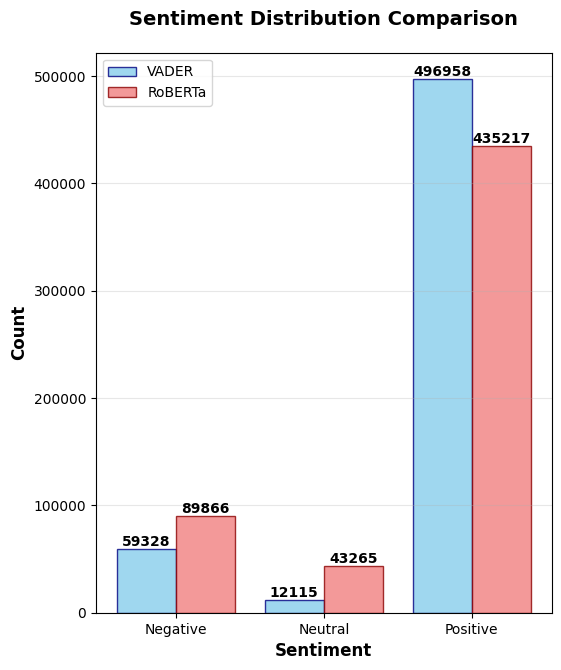

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('default')
sns.set_palette("husl")
fig = plt.figure(figsize=(20, 16))

#Sentiment Distribution
ax1 = plt.subplot(2, 3, 1)
sentiments = ['Negative', 'Neutral', 'Positive']
x = np.arange(len(sentiments))

vader_counts = df2['sentiment_vader'].value_counts().reindex(sentiments, fill_value=0)
roberta_counts = df2['sentiment_roberta'].value_counts().reindex(sentiments, fill_value=0)

bars1 = ax1.bar(x - 0.2, vader_counts.values, 0.4, label='VADER', alpha=0.8, color='skyblue', edgecolor='navy')
bars2 = ax1.bar(x + 0.2, roberta_counts.values, 0.4, label='RoBERTa', alpha=0.8, color='lightcoral', edgecolor='darkred')

ax1.set_xlabel('Sentiment', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
ax1.set_title('Sentiment Distribution Comparison', fontsize=14, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(sentiments)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

Text(1650.8692810457517, 0.5, 'VADER Prediction')

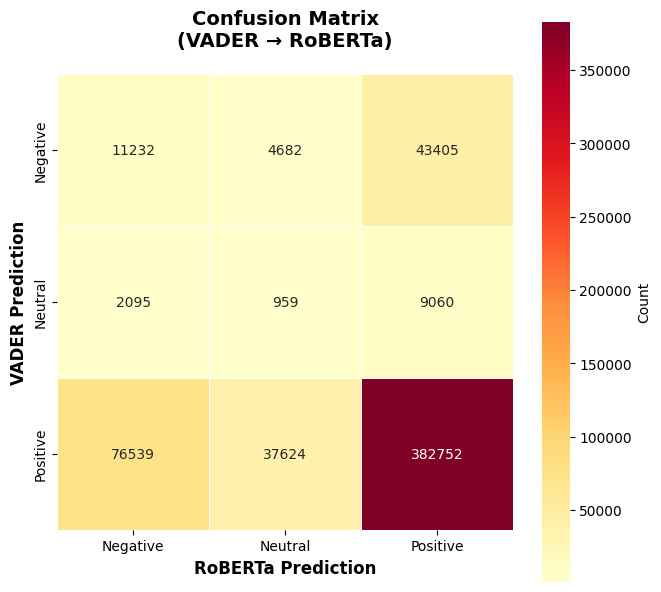

In [87]:
sns.set_palette("husl")

fig = plt.figure(figsize=(25, 16))
ax3 = plt.subplot(2, 3, 3)
confusion_matrix = pd.crosstab(df2['sentiment_vader'], df2['sentiment_roberta'],
                              margins=False, margins_name='Total')
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlOrRd',
            cbar_kws={'label': 'Count'}, ax=ax3, square=True,
            linewidths=0.5, linecolor='white')

ax3.set_title('Confusion Matrix\n(VADER → RoBERTa)', fontsize=14, fontweight='bold', pad=20)
ax3.set_xlabel('RoBERTa Prediction', fontsize=12, fontweight='bold')
ax3.set_ylabel('VADER Prediction', fontsize=12, fontweight='bold')

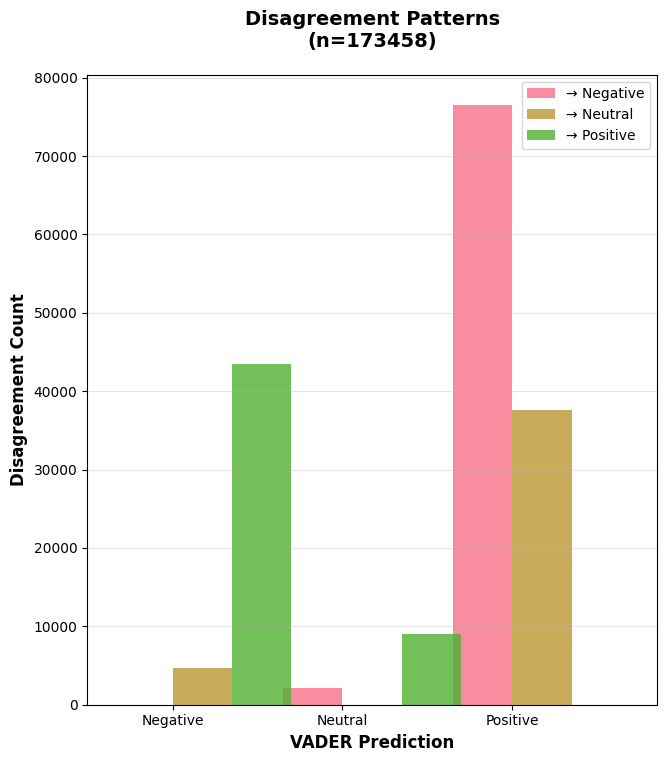

In [79]:
# 5. DISAGREEMENT ANALYSIS (Bar Chart)
sns.set_palette("husl")

fig = plt.figure(figsize=(25, 18))
ax5 = plt.subplot(2, 3, 5)
disagreements = df2[~agreement_mask]

if len(disagreements) > 0:
    # Count disagreement types
    disagreement_counts = pd.crosstab(disagreements['sentiment_vader'],
                                    disagreements['sentiment_roberta'])

    # Create positions for bars
    vader_dis = disagreement_counts.index
    x_dis = np.arange(len(vader_dis))
    width = 0.35

    # Plot bars
    for i, roberta_sent in enumerate(disagreement_counts.columns):
        ax5.bar(x_dis + i*width, disagreement_counts[roberta_sent], width,
                label=f'→ {roberta_sent}', alpha=0.8)

    ax5.set_xlabel('VADER Prediction', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Disagreement Count', fontsize=12, fontweight='bold')
    ax5.set_title(f'Disagreement Patterns\n(n={len(disagreements)})', fontsize=14, fontweight='bold', pad=20)
    ax5.set_xticks(x_dis + width/2)
    ax5.set_xticklabels(vader_dis)
    ax5.legend()
    ax5.grid(axis='y', alpha=0.3)
else:
    ax5.text(0.5, 0.5, 'Perfect Agreement!\nNo Disagreements',
             ha='center', va='center', transform=ax5.transAxes, fontsize=16,
             color='green', fontweight='bold')
    ax5.set_title('Disagreement Analysis', fontsize=14, fontweight='bold', pad=20)

Text(0.5, 1.0, 'VADER vs RoBERTa Agreement')

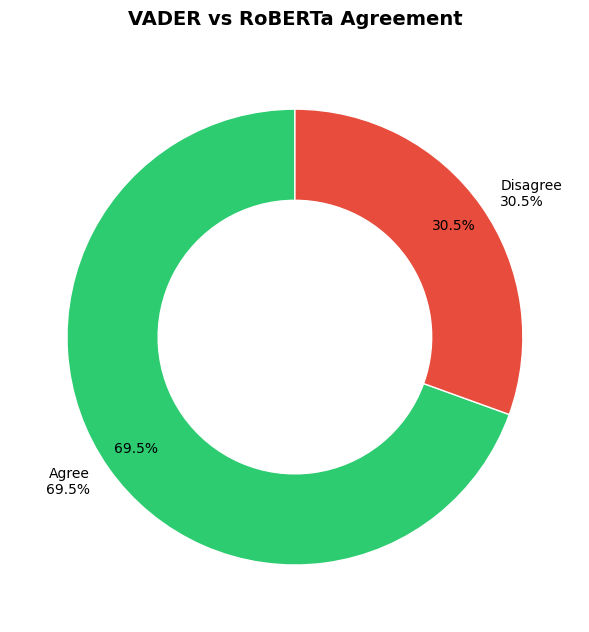

In [83]:
# 2. AGREEMENT RATE (Donut Chart)
sns.set_palette("husl")

fig = plt.figure(figsize=(25, 18))
ax2 = plt.subplot(2, 3, 2)
agreement_mask = df2['sentiment_vader'] == df2['sentiment_roberta']
agreement_rate = agreement_mask.sum() / len(df2) * 100
disagreement_rate = 100 - agreement_rate

# Donut chart data
sizes = [agreement_rate, disagreement_rate]
colors = ['#2ecc71', '#e74c3c']
labels = [f'Agree\n{agreement_rate:.1f}%', f'Disagree\n{disagreement_rate:.1f}%']

wedges, texts, autotexts = ax2.pie(sizes, labels=labels, colors=colors,
                                   autopct='%1.1f%%', startangle=90,
                                   pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='white'))

ax2.set_title('VADER vs RoBERTa Agreement', fontsize=14, fontweight='bold', pad=20)


In [92]:
# Key results
print("SENTIMENT ANALYSIS")
print("="*60)
print(f"Dataset Size: {len(df2):,} reviews")
print(f"Agreement Rate: {agreement_rate:.2f}% ({agreement_mask.sum():,} matching)")
print(f"Disagreements: {len(disagreements):,} reviews")
print(f"Overall Accuracy: {agreement_rate:.1f}%")
print("\n Distribution Comparison:")
print(f" VADER - Positive: {vader_counts['Positive']} | Neutral: {vader_counts['Neutral']} | Negative: {vader_counts['Negative']}")
print(f" RoBERTa - Positive: {roberta_counts['Positive']} | Neutral: {roberta_counts['Neutral']} | Negative: {roberta_counts['Negative']}")

SENTIMENT ANALYSIS
Dataset Size: 568,401 reviews
Agreement Rate: 69.48% (394,943 matching)
Disagreements: 173,458 reviews
Overall Accuracy: 69.5%

 Distribution Comparison:
 VADER - Positive: 496958 | Neutral: 12115 | Negative: 59328
 RoBERTa - Positive: 435217 | Neutral: 43265 | Negative: 89866
